# 케라스 API 소개

In [10]:
from pathlib import Path
import pandas as pd
from sklearn.model_selection import train_test_split

In [7]:
data_dir = Path('../input/')
feature_file = data_dir / 'feature.csv'

In [8]:
target_col = 'class'
id_col = 'id'
n_class = 3
n_trn = 320000
seed = 42

In [6]:
df = pd.read_csv(feature_file, index_col=id_col)
print(df.shape)
df.head()

(400000, 20)


,z,redshift,dered_u,dered_g,dered_r,dered_i,dered_z,nObserve,airmass_u,class,d_dered_u,d_dered_g,d_dered_r,d_dered_i,d_dered_z,d_dered_ig,d_dered_zg,d_dered_rz,d_dered_iz,d_obs_det
id,,,,,,,,,,,,,,,,,,,,
0,16.939607,-0.000081,23.12426,20.25779,18.95512,17.63211,16.90894,2.944439,1.189764,0.0,-0.139696,-0.078983,-0.054380,-0.040329,-0.030667,-2.62568,-3.34885,2.04618,0.72317,-15.055561
1,13.168941,0.004506,14.96642,14.00452,13.41139,13.23625,13.13468,0.693147,1.253254,1.0,-0.085727,-0.057449,-0.041028,-0.032200,-0.034261,-0.76827,-0.86984,0.27671,0.10157,-0.306853
2,15.350032,0.000472,16.60765,15.68659,15.44004,15.32173,15.29608,1.098612,1.022499,0.0,-0.178735,-0.138836,-0.096278,-0.071805,-0.053952,-0.36486,-0.39051,0.14396,0.02565,-0.901388
3,19.634649,0.000006,25.35365,20.99465,20.08727,19.79465,19.55518,1.609438,1.205399,0.0,-0.306988,-0.194077,-0.133888,-0.100299,-0.079469,-1.20000,-1.43947,0.53209,0.23947,-1.390562
4,17.982649,-0.000033,23.77140,20.43384,18.86299,18.19028,17.87592,2.639057,1.193946,0.0,-0.682029,-0.265330,-0.179378,-0.133872,-0.106729,-2.24356,-2.55792,0.98707,0.31436,-9.360943


In [11]:
X_trn, X_val, y_trn, y_val = train_test_split(df.iloc[:n_trn].drop(target_col, axis=1), 
                                              df.iloc[:n_trn][target_col],
                                              test_size=.2, random_state=seed)
print(X_trn.shape, X_val.shape, y_trn.shape, y_val.shape)

(256000, 19) (64000, 19) (256000,) (64000,)


## 순차적 (Sequential) API

In [16]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import plot_model

In [9]:
model = Sequential()

model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=n_class, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam')

In [12]:
model.fit(X_trn, y_trn, epochs=5)

Epoch 1/5
8000/8000 [==============================] - 4s 509us/step - loss: 0.7653
Epoch 2/5
8000/8000 [==============================] - 4s 506us/step - loss: 0.3875
Epoch 3/5
8000/8000 [==============================] - 4s 497us/step - loss: 0.2963
Epoch 4/5
8000/8000 [==============================] - 4s 496us/step - loss: 0.2699
Epoch 5/5
8000/8000 [==============================] - 4s 495us/step - loss: 0.2559


In [15]:
p_val = model.predict(X_val)
p_val.shape

(64000, 3)

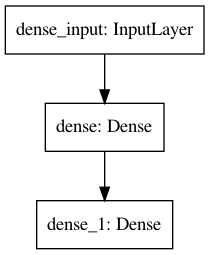

In [17]:
plot_model(model)

## 함수적 (Functional) API

In [18]:
from tensorflow.keras import Input, Model

In [19]:
inputs = Input(shape=(X_trn.shape[1],))
x = Dense(64, activation='relu')(inputs)
outputs = Dense(n_class, activation='softmax')(x)
model = Model(inputs=inputs, outputs=outputs)
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam')

In [20]:
model.fit(X_trn, y_trn, epochs=5)

Epoch 1/5
8000/8000 [==============================] - 4s 513us/step - loss: 0.7498
Epoch 2/5
8000/8000 [==============================] - 4s 512us/step - loss: 0.4035
Epoch 3/5
8000/8000 [==============================] - 4s 509us/step - loss: 0.2845
Epoch 4/5
8000/8000 [==============================] - 4s 503us/step - loss: 0.2653
Epoch 5/5
8000/8000 [==============================] - 4s 498us/step - loss: 0.2553


In [21]:
p_val = model.predict(X_val)
p_val.shape

(64000, 3)

## 객체지향적 (Object Oriented) API

In [27]:
import tensorflow as tf
from tensorflow.keras.layers import Layer

class SimpleDense(Layer):
    
    def __init__(self, units, activation=None):
        super().__init__()
        self.units = units
        self.activation = activation
        
    def build(self, input_shape):
        input_dim = input_shape[-1]
        self.W = self.add_weight(shape=(input_dim, self.units),
                                 initializer='random_normal')
        self.b = self.add_weight(shape=(self.units,),
                                 initializer='zeros')
        
    def call(self, inputs):
        y = tf.matmul(inputs, self.W) + self.b
        if self.activation is not None:
            y = self.activation(y)
        return y

In [28]:
from tensorflow.keras.activations import relu, softmax

model = Sequential()

model.add(SimpleDense(units=64, activation=relu))
model.add(SimpleDense(units=n_class, activation=softmax))
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam')

In [29]:
model.fit(X_trn, y_trn, epochs=5)

Epoch 1/5
8000/8000 [==============================] - 4s 515us/step - loss: 0.7172
Epoch 2/5
8000/8000 [==============================] - 4s 513us/step - loss: 0.3238
Epoch 3/5
8000/8000 [==============================] - 4s 514us/step - loss: 0.2701
Epoch 4/5
8000/8000 [==============================] - 4s 509us/step - loss: 0.2575
Epoch 5/5
8000/8000 [==============================] - 4s 502us/step - loss: 0.2504


In [30]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_dense_4 (SimpleDense) (32, 64)                  1280      
_________________________________________________________________
simple_dense_5 (SimpleDense) (32, 3)                   195       
Total params: 1,475
Trainable params: 1,475
Non-trainable params: 0
_________________________________________________________________
